<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

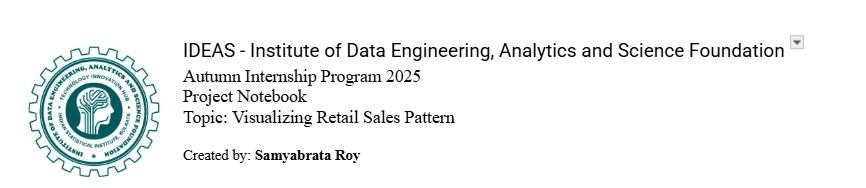

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [2]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kqDqFkMblqNBmt68clyn_CCNpdghgrE3"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

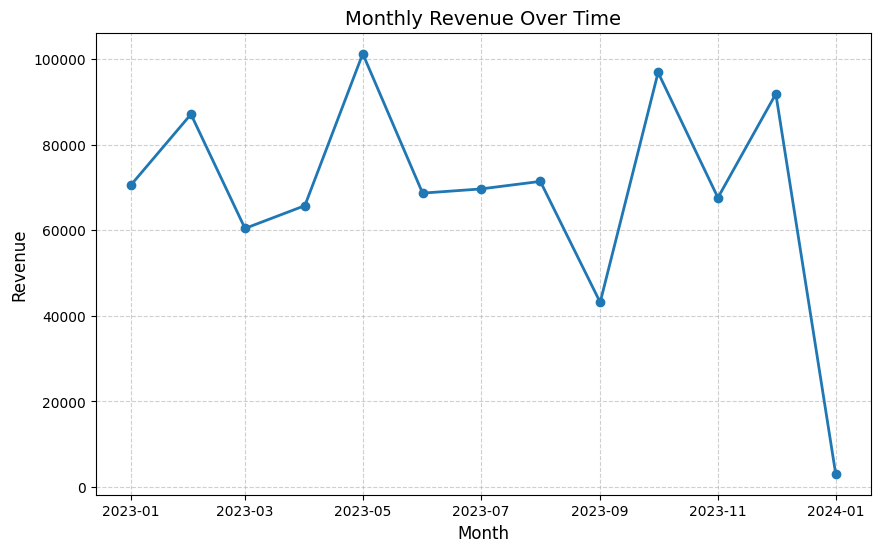

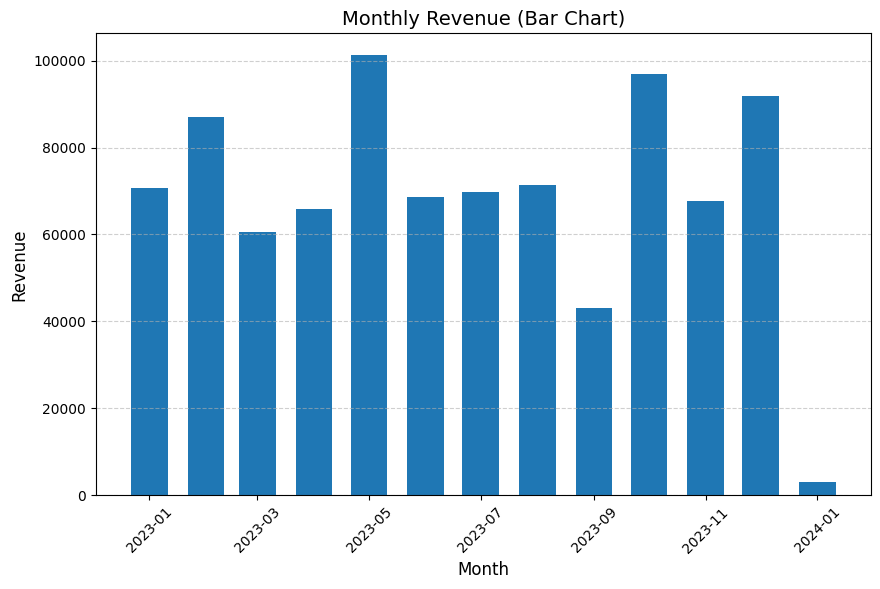

In [3]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Q. Can you interpret the above bar diagram?

Q. What are your key takeaways?

Interpretation of bar diagram

>Some months show noticeable peaks, which could correspond to festive seasons, holidays, or promotional campaigns.

>Other months show dips, possibly due to off-season sales or reduced consumer spending.

>Overall, this visualization highlights seasonal patterns in customer purchasing behavior.

Key takeways

>Sales are not uniform — they peak during specific months.

>Helps in strategic planning: allocate marketing spend and inventory to match high-demand months.

>Can be used for forecasting revenue trends in future years.



---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


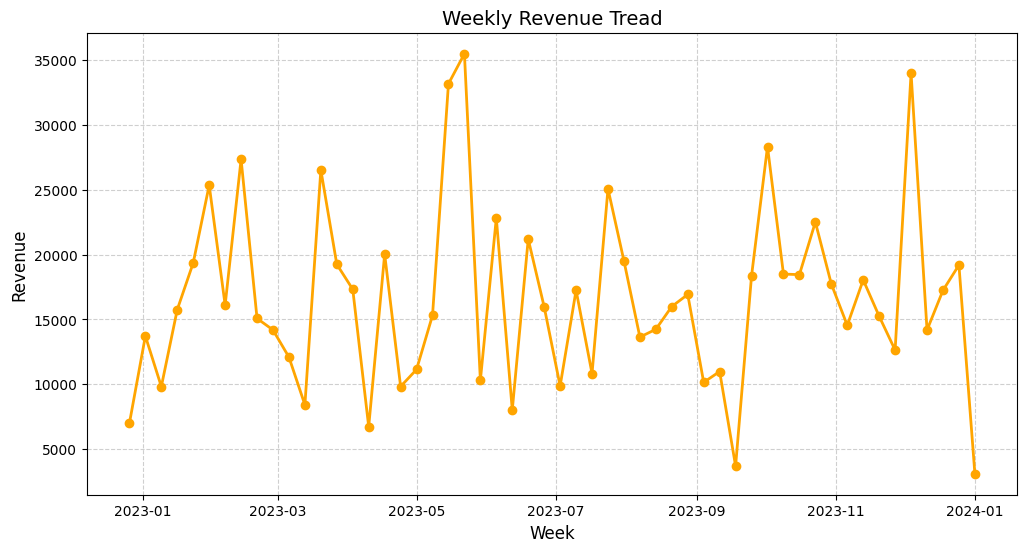

In [4]:
#group by week
weekly_revenue=df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount'].sum()

#convert periodIndex to timestamp

weekly_revenue.index=weekly_revenue.index.to_timestamp()


#plot weekly Revenue

plt.figure(figsize=(12,6))
plt.plot(weekly_revenue.index,weekly_revenue.values,marker='o',linewidth=2,color='orange')
plt.title("Weekly Revenue Tread",fontsize=14)
plt.xlabel("Week",fontsize=12)
plt.ylabel("Revenue",fontsize=12)
plt.grid(True,linestyle="--",alpha=0.6)
plt.show()

Differences Noticed:

>Weekly revenue trend is more granular — shows short-term spikes and dips that monthly charts may smooth out.

>Weekly view helps identify specific events or campaigns impacting sales.

>Monthly trend is better for long-term patterns, while weekly is good for short-term operational insights.



---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

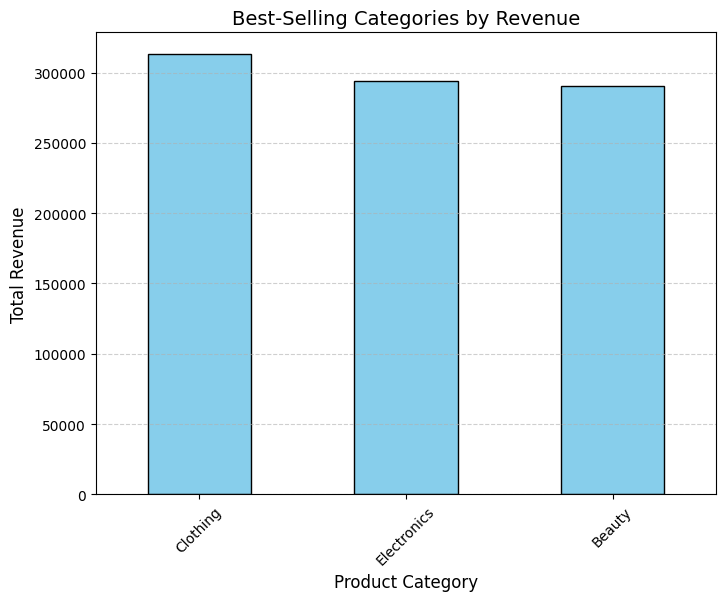

In [5]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

Clothing category has done the biggest contribution to the revenue



---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

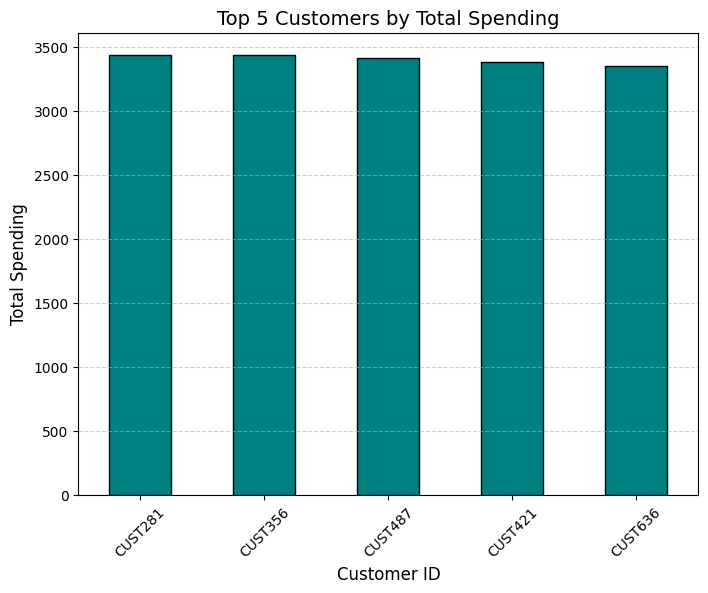

In [6]:
# Group by Customer and sum their spending
top_customers = df_sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(8,6))
top_customers.plot(kind='bar', color='teal', edgecolor='black')

plt.title("Top 5 Customers by Total Spending", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

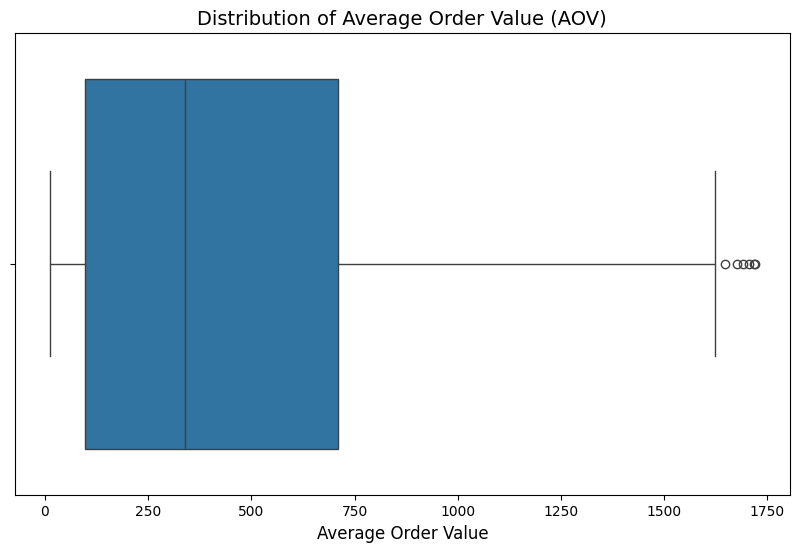

In [7]:
# Calculate Average Order Value = Total Amount per customer / number of orders
aov = df_sales.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'nunique'   # assuming each row has an Order ID
})
aov['AOV'] = aov['Total Amount'] / aov['Transaction ID']

# Plot AOV
plt.figure(figsize=(10,6))
sns.boxplot(x=aov['AOV'])
plt.title("Distribution of Average Order Value (AOV)", fontsize=14)
plt.xlabel("Average Order Value", fontsize=12)
plt.show()

In [8]:
# Calculate IQR
Q1 = aov['AOV'].quantile(0.25)
Q3 = aov['AOV'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for unusually high AOVs
upper_threshold = Q3 + 1.5 * IQR

# Filter customers above the threshold
high_aov_customers = aov[aov['AOV'] > upper_threshold]

print("Customers with unusually high AOVs:")
print(high_aov_customers[['AOV']])


Customers with unusually high AOVs:
                    AOV
Customer ID            
CUST281      1719.24775
CUST356      1717.70120
CUST421      1691.12975
CUST487      1706.08175
CUST636      1676.31015
CUST805      1647.12850




---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

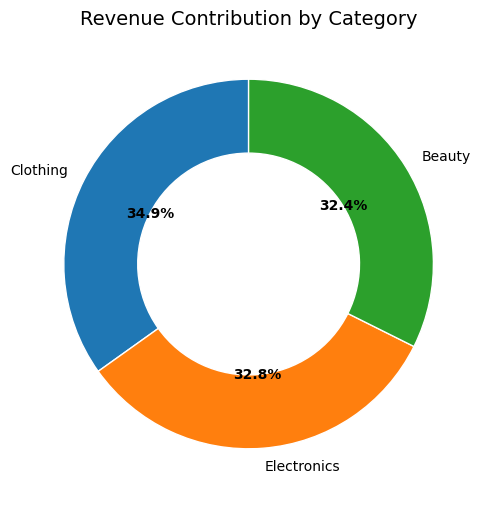

In [9]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?

>Yes — donut charts are visually appealing and make percentage contribution clear.

>However, they can become hard to interpret if too many categories exist.

Q. What else we could have come up with apart from donut chart to server the same purpose?

>Bar chart (sorted) → Easier to compare contributions side-by-side.

>Treemap → Good for showing part-to-whole relationship when categories are many.

>Stacked bar chart → Useful when comparing categories across multiple dimensions.



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

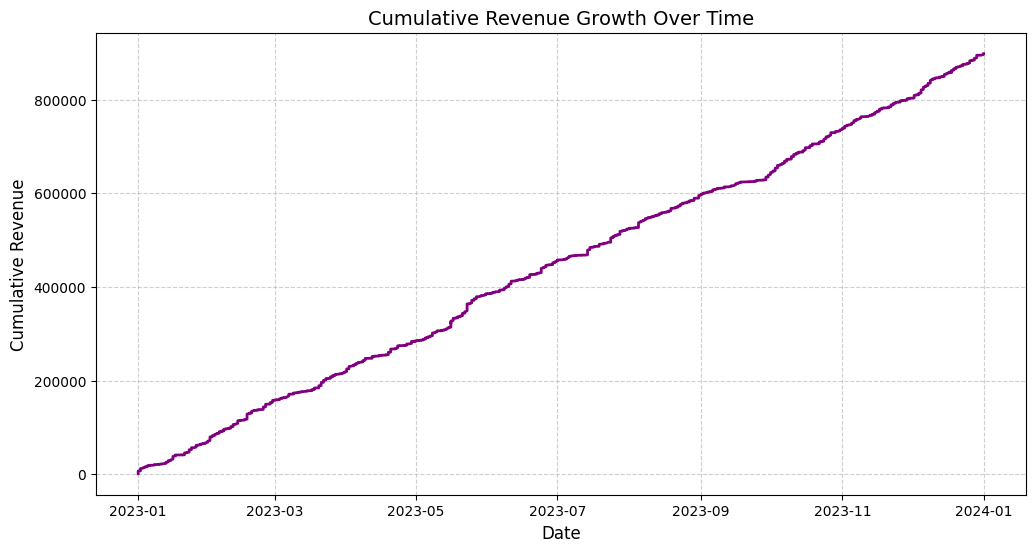

In [10]:
# Sort by date
df_sales = df_sales.sort_values('Date')

# Calculate cumulative revenue
df_sales['Cumulative Revenue'] = df_sales['Total Amount'].cumsum()

# Plot cumulative revenue
plt.figure(figsize=(12,6))
plt.plot(df_sales['Date'], df_sales['Cumulative Revenue'], color='purple', linewidth=2)
plt.title("Cumulative Revenue Growth Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Why it helps:

>hows long-term sales growth trajectory.

>Helps assess overall business progress: Is revenue growing steadily, accelerating, or plateauing?

>Useful for investors and management to check whether revenue is compounding over time.



---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv('/content/customer_shopping_data.csv')

In [27]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [28]:
data.shape

(99457, 10)

In [29]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

Exploratery Data Analysis(EDA)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [31]:
data.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [32]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [34]:
data['age'].value_counts()

,count
age,
37,2057
22,2051
64,2002
43,2000
51,1993
30,1981
24,1977
40,1960
48,1955


In [36]:
data['gender'].value_counts()

,count
gender,
Female,59482
Male,39975


In [38]:
data['category'].value_counts()

,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


Data visualization

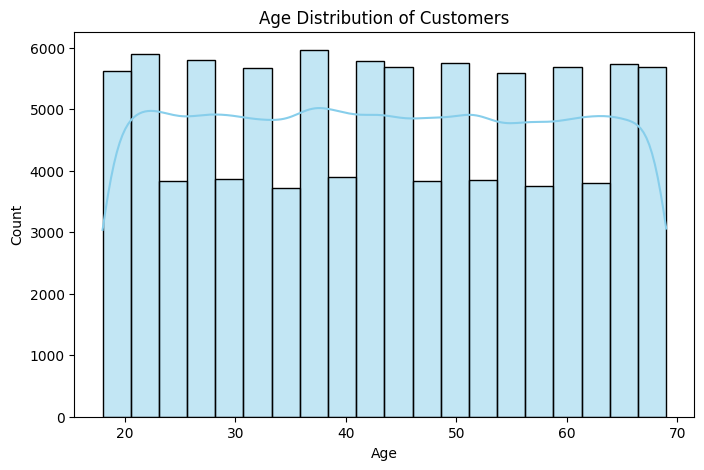

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3375608036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="gender", palette="Set2")


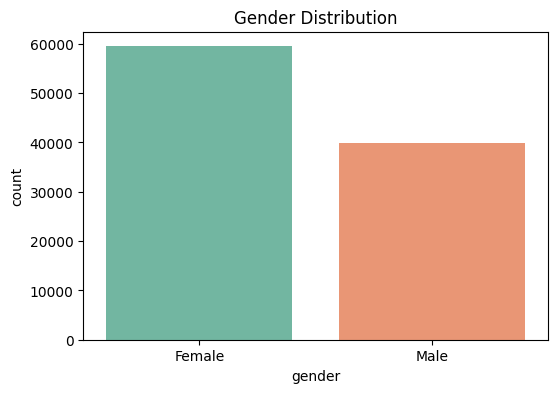

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="gender", palette="Set2")
plt.title("Gender Distribution")
plt.show()

/tmp/ipython-input-574546416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="category", order=data["category"].value_counts().index, palette="viridis")


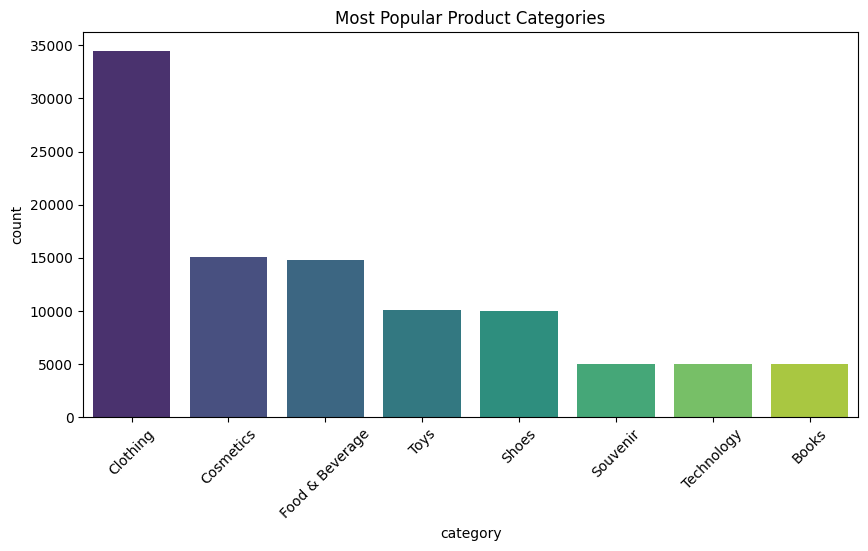

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="category", order=data["category"].value_counts().index, palette="viridis")
plt.title("Most Popular Product Categories")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2522335983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="Blues_r")


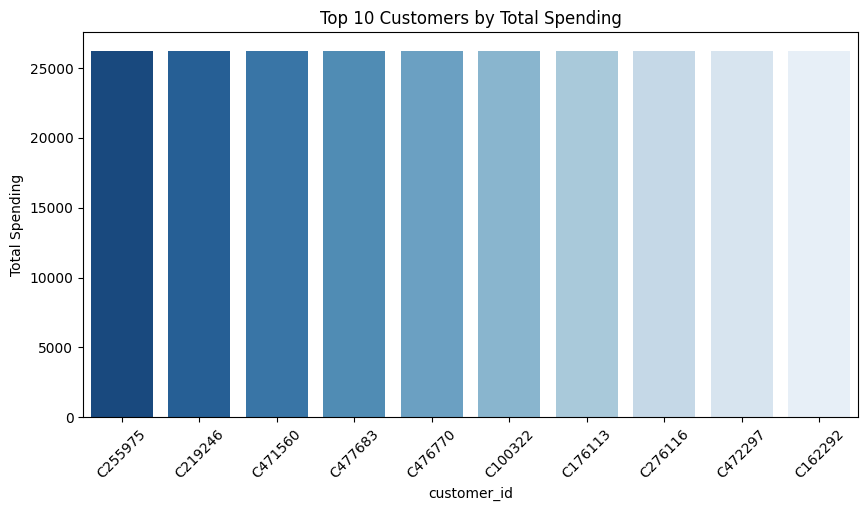

In [47]:
data["total_spent"] = data["quantity"] * data["price"]

top_customers = data.groupby("customer_id")["total_spent"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Blues_r")
plt.title("Top 10 Customers by Total Spending")
plt.xticks(rotation=45)
plt.ylabel("Total Spending")
plt.show()

/tmp/ipython-input-2725625387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="cubehelix")


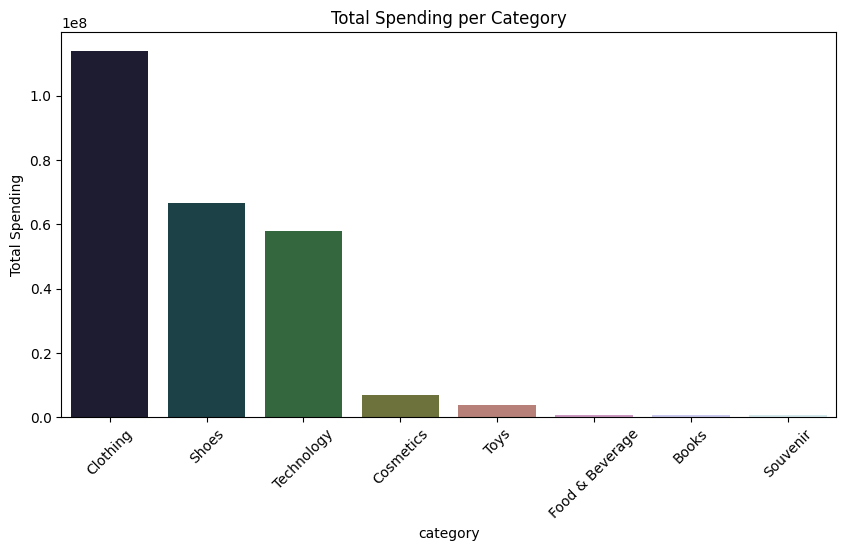

In [49]:
category_sales = data.groupby("category")["total_spent"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="cubehelix")
plt.title("Total Spending per Category")
plt.xticks(rotation=45)
plt.ylabel("Total Spending")
plt.show()

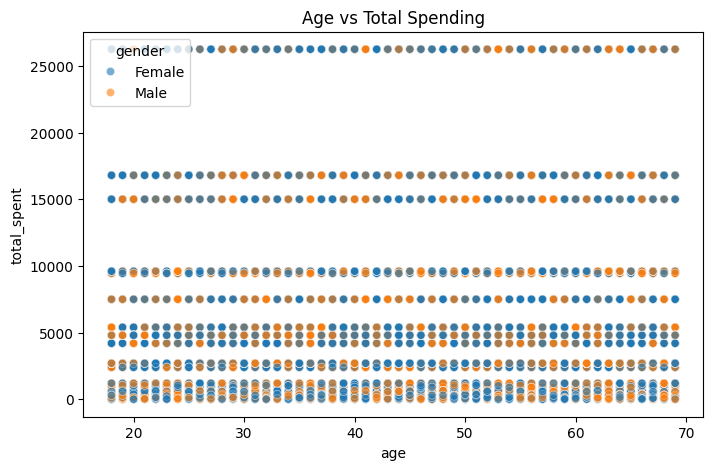

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="age", y="total_spent", hue="gender", alpha=0.6)
plt.title("Age vs Total Spending")
plt.show()

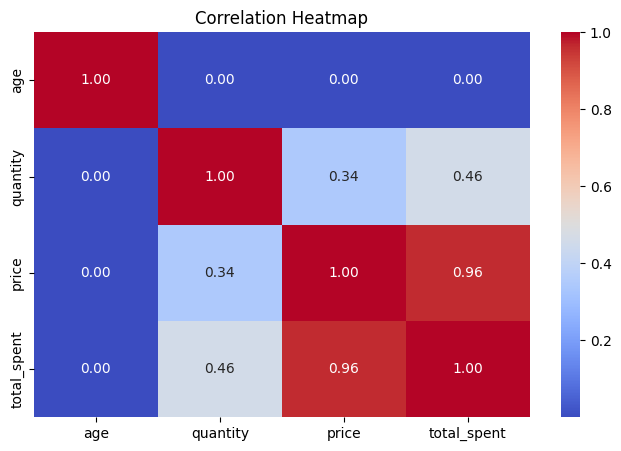

In [52]:
plt.figure(figsize=(8,5))
sns.heatmap(data[["age", "quantity", "price", "total_spent"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [53]:
# Convert invoice_date to datetime
data["invoice_date"] = pd.to_datetime(data["invoice_date"], errors="coerce", dayfirst=True)

# Group by month
data["year_month"] = data["invoice_date"].dt.to_period("M")
monthly_sales = data.groupby("year_month")["total_spent"].sum()


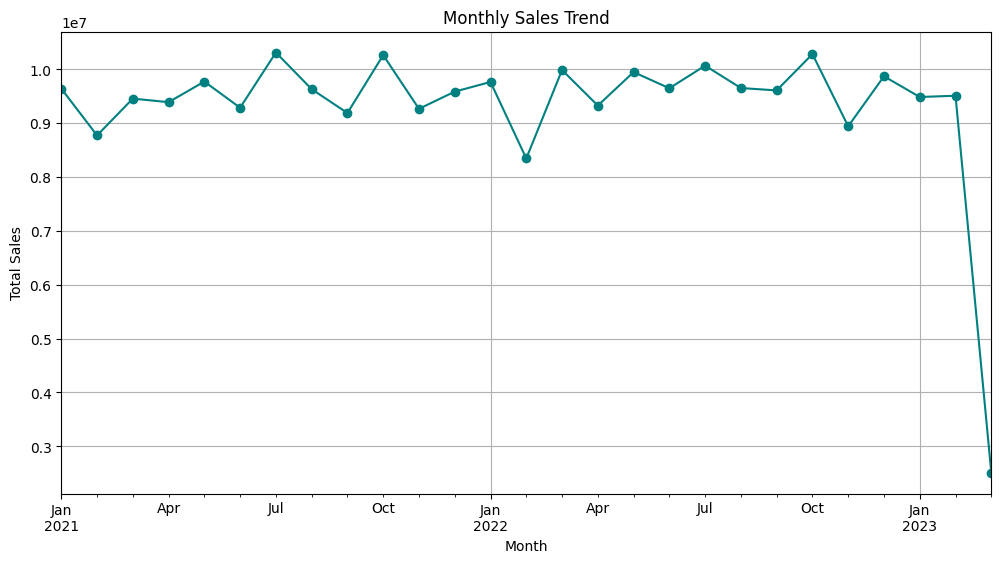

In [54]:
# Plot monthly sales trend
plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o", color="teal")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

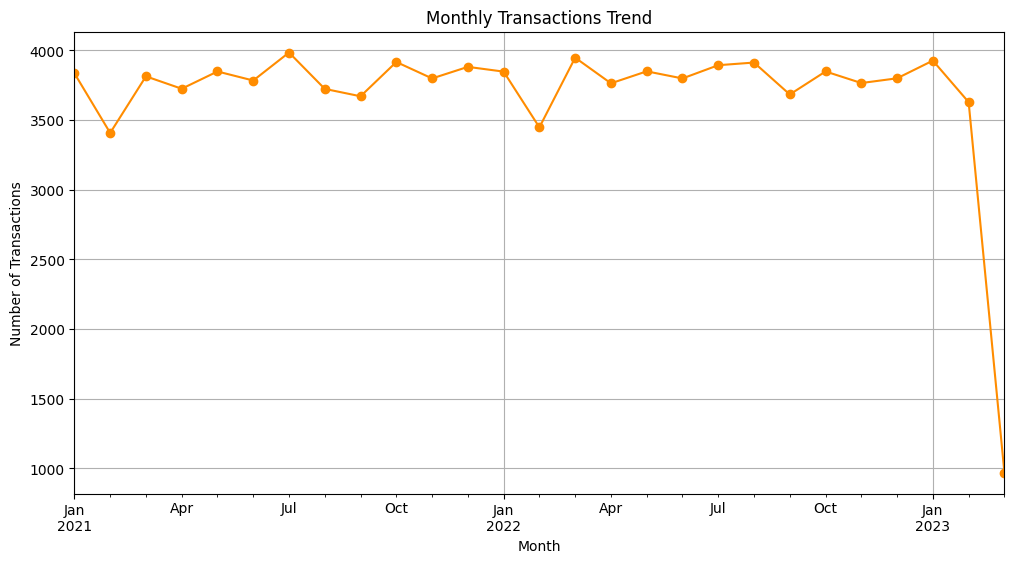

In [55]:
 #Transactions per month
monthly_transactions = data.groupby("year_month")["invoice_no"].nunique()

plt.figure(figsize=(12,6))
monthly_transactions.plot(marker="o", color="darkorange")
plt.title("Monthly Transactions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()